<a href="https://colab.research.google.com/github/Mdhasim-tech/Machine-learning/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset
df=pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Select only the features we want
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
# Apply kMeans
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
df['cluster']=kmeans.fit_predict(X)

# Get centroids
centroids=kmeans.cluster_centers_
print(centroids)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


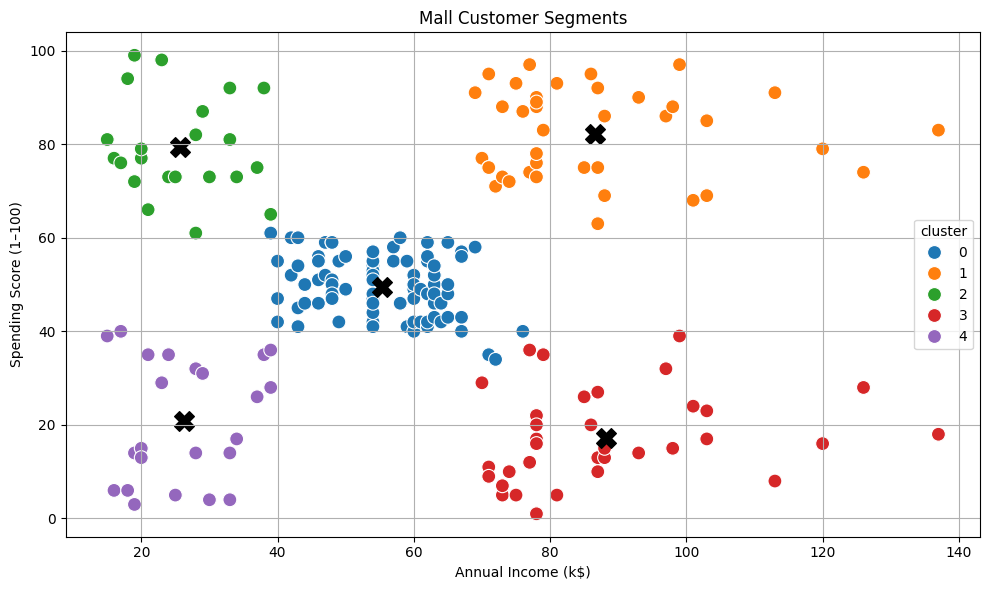

In [ ]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                palette="tab10",
                hue='cluster',
                data=df,
                 s=100
                )
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("Mall Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.grid(True)
plt.tight_layout()
plt.show()

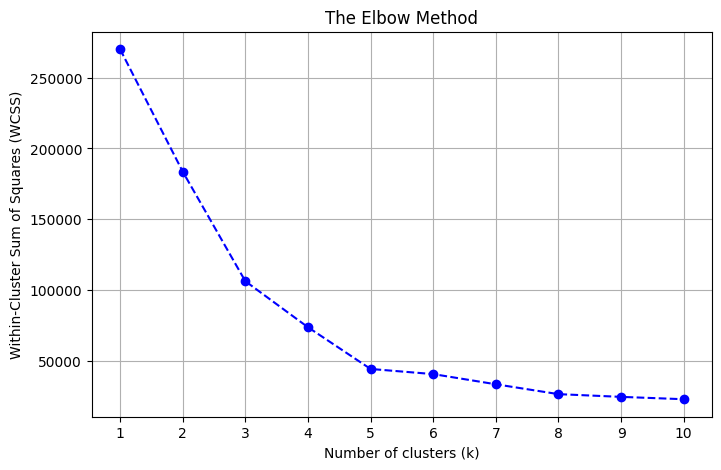

In [ ]:
# Calculate WCSS for k = 1 to 10
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # .inertia_ is the WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo--')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
k_means_best=KMeans(n_clusters=5,random_state=42)
df['cluster']=k_means_best.fit_predict(X)

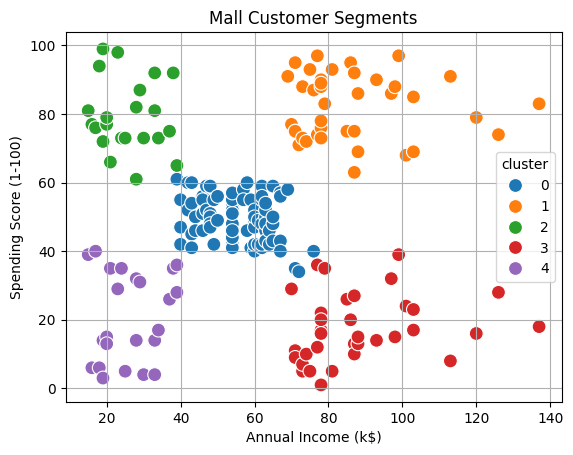

In [ ]:
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    palette='tab10',
    s=100
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Mall Customer Segments")
plt.grid(True)
plt.show()

In [ ]:

print(k_means_best.predict([[20,70]]))

[2]


In [ ]:
import joblib
joblib.dump(k_means_best, 'kmeans_model.pkl ')

['kmeans_model.pkl ']

In [ ]:
df.to_csv("dataset.csv", index=False)